# Importacion de librerias y carga de datos

In [ ]:
#Importacion de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1_pLgrGHxajA0645dUjNsQS_nBiVrHgVW/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =";")
data = datadrive.drop(["ID","b","e","DR"], axis = 1)

In [ ]:
data

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,0,0,0,40,137,177,4,0,153,150,152,2,0,1
2122,140,1,0,9,78,0.4,22,7.1,0,0,0,66,103,169,6,0,152,148,151,3,1,1
2123,140,1,0,7,79,0.4,20,6.1,0,0,0,67,103,170,5,0,153,148,152,4,1,1
2124,140,1,0,9,78,0.4,27,7.0,0,0,0,66,103,169,6,0,152,147,151,4,1,1


# Exploracion de datos
Se hace una exploracion de los datos para conocer las columnas, el tipo de dato almacenadas en ellas y si hay valores nulos, De igual manera se hace una exploracion de los datos en cada columna, esto para ver no solo de que tipo son los datos almacenados en ellas, si no, para conocer de donde a donde van

In [ ]:
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [ ]:
for col in data:
  print(data[col].value_counts())

133    136
130    111
122    109
138    103
125     91
128     85
120     78
142     77
144     77
132     76
136     72
140     70
134     67
135     65
146     62
127     60
137     59
129     57
131     56
143     56
123     56
148     52
121     44
139     39
141     39
126     38
145     37
115     28
150     26
110     21
149     18
119     17
152     17
112     16
147     14
151     14
159     12
114     11
158     10
124     10
118      9
154      8
106      7
116      5
157      4
156      4
117      2
160      1
Name: LBE, dtype: int64
0     891
1     242
2     164
3     162
4     148
5     110
6     104
7      76
8      56
9      50
10     40
12     17
11     16
13     15
14     13
17      7
15      5
16      4
18      2
19      2
26      1
21      1
Name: AC, dtype: int64
0      1311
1       208
2       119
3        85
4        65
       ... 
28        1
290       1
39        1
70        1
49        1
Name: FM, Length: 96, dtype: int64
0     332
3     294
4     272
1     23

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


Al no haber valores nulos no hay que corregir nada, sin embargo, es bueno saber con que tipo de daros vamos a tratar y cuantos valores hay en cada columna

# Clasificacion de variables
Se clasifican las carables, lo cual nos ayudara a escoger que tipo de algoritmo usar dependeindo de su clasificacion

LBE 
AC 
FM 
UC 
ASTV P
MSTV 
ALTV 
MLTV 
DR 
Width 
Min Minimum 
Max Maximum 
Mode 
Mean 
Median 
Variance 

In [ ]:
Cuantitativas_continuas =  data.loc[:,["LBE", "AC", "FM", "UC", "ASTV", 'MSTV', 'ALTV', 'MLTV',  'Width', 'Min', 'Max', 'Mode', 'Mean', 'Median', 'Variance']]
Cuantitativas_continuas

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Mode,Mean,Median,Variance
0,120,0,0,0,73,0.5,43,2.4,64,62,126,120,137,121,73
1,132,4,0,4,17,2.1,0,10.4,130,68,198,141,136,140,12
2,133,2,0,5,16,2.1,0,13.4,130,68,198,141,135,138,13
3,134,2,0,6,16,2.4,0,23.0,117,53,170,137,134,137,13
4,132,4,0,5,16,2.4,0,19.9,117,53,170,137,136,138,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,40,137,177,153,150,152,2
2122,140,1,0,9,78,0.4,22,7.1,66,103,169,152,148,151,3
2123,140,1,0,7,79,0.4,20,6.1,67,103,170,153,148,152,4
2124,140,1,0,9,78,0.4,27,7.0,66,103,169,152,147,151,4


In [ ]:
Cuantitativa_discreta =  data.loc[:,["Nmax", "Nzeros", "DL", "DS","DP" ]]
Cuantitativa_discreta

,Nmax,Nzeros,DL,DS,DP
0,2,0,0,0,0
1,6,1,2,0,0
2,5,1,2,0,0
3,11,0,2,0,0
4,9,0,0,0,0
...,...,...,...,...,...
2121,4,0,0,0,0
2122,6,0,0,0,0
2123,5,0,0,0,0
2124,6,0,0,0,0


In [ ]:
Cuantitativa_politomica =  data.loc[:,["Tendency","Target"]]
Cuantitativa_politomica

,Tendency,Target
0,1,1
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
2121,0,1
2122,1,1
2123,1,1
2124,1,1


# Matriz de correlacion
Se hace una matriz de correlacion para ver la correlacion entre las variables, ordenarlas y ver que las escogidas no hagan sobre entrenamiento

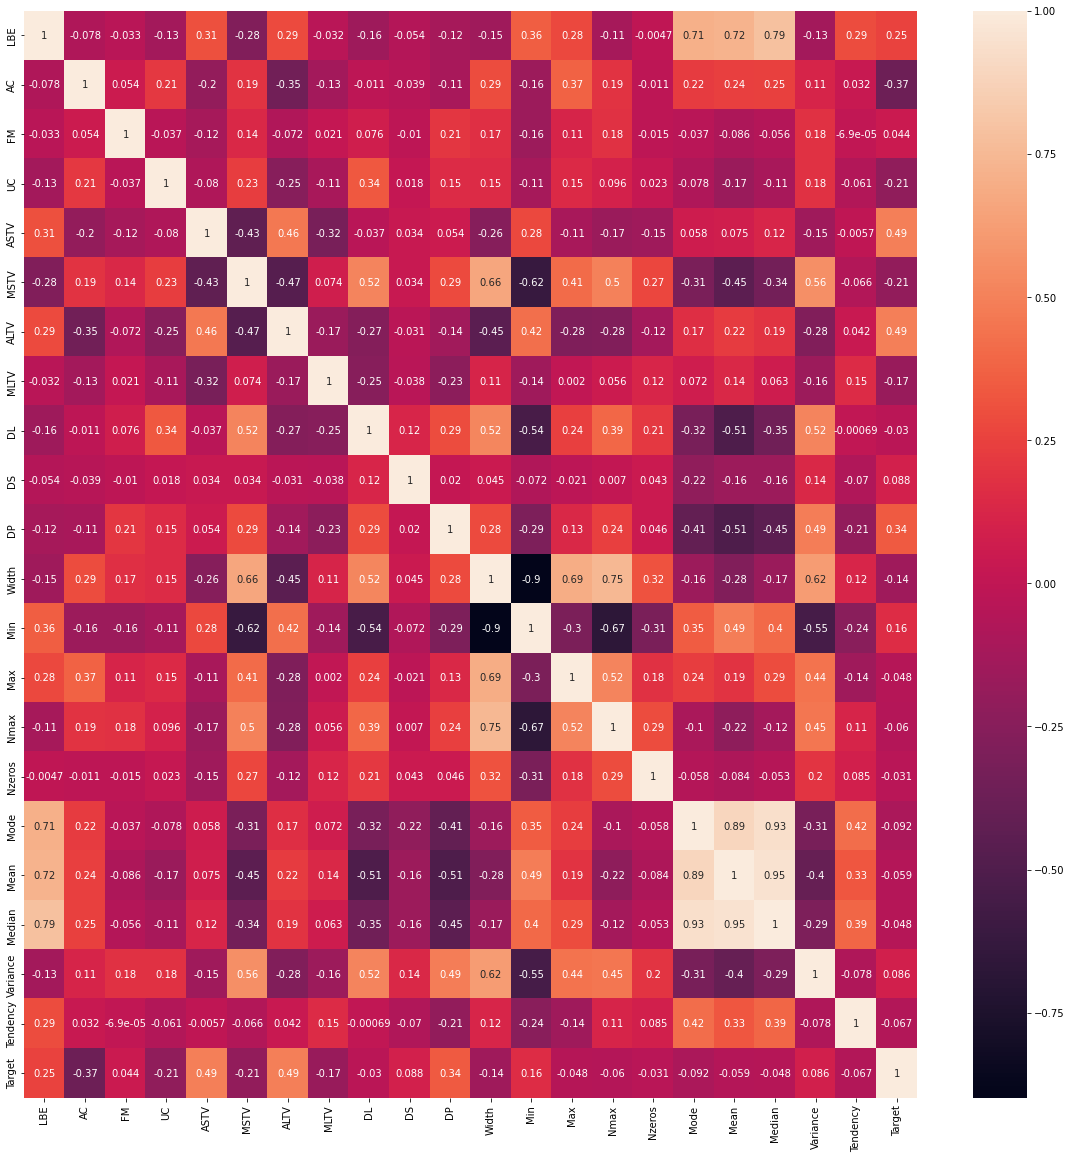

In [ ]:
plt.figure(figsize=(20,20))
corr = data.corr()
# cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr,annot=True)

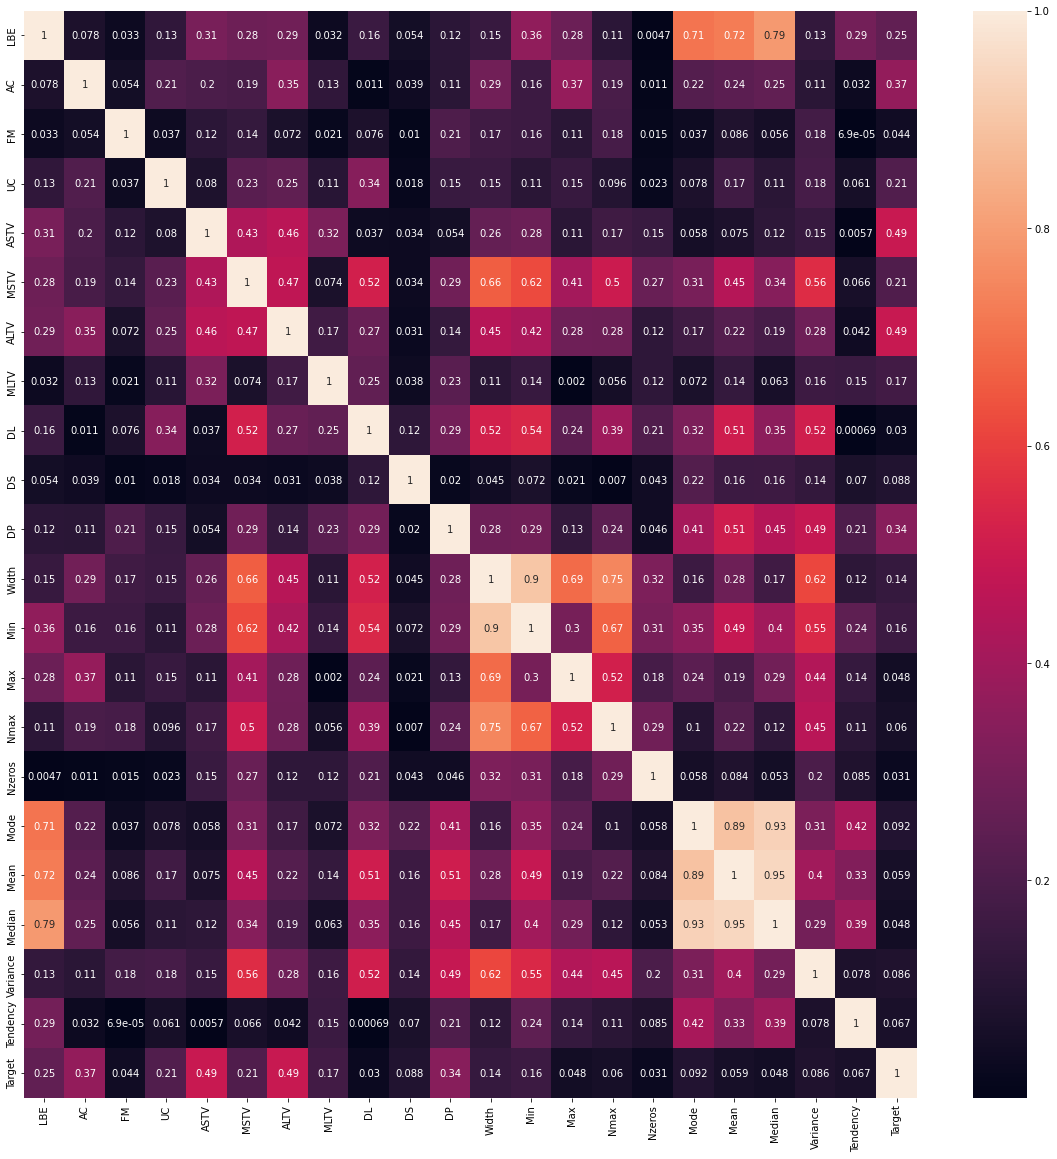

In [ ]:
# Mapa con valor absoluto
plt.figure(figsize=(20,20))
corr = data.corr()
# cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr.abs(),annot=True)

In [ ]:
# Se ordenan las variables de acuerdo a su correlacion con price
Target = data.corr().abs()
Target = Target.loc[:,["Target"]]
Target = Target.sort_values(ascending=False, by= "Target")
Tlist = Target.index.tolist()
print(Tlist)

['Target', 'ASTV', 'ALTV', 'AC', 'DP', 'LBE', 'UC', 'MSTV', 'MLTV', 'Min', 'Width', 'Mode', 'DS', 'Variance', 'Tendency', 'Nmax', 'Mean', 'Max', 'Median', 'FM', 'Nzeros', 'DL']


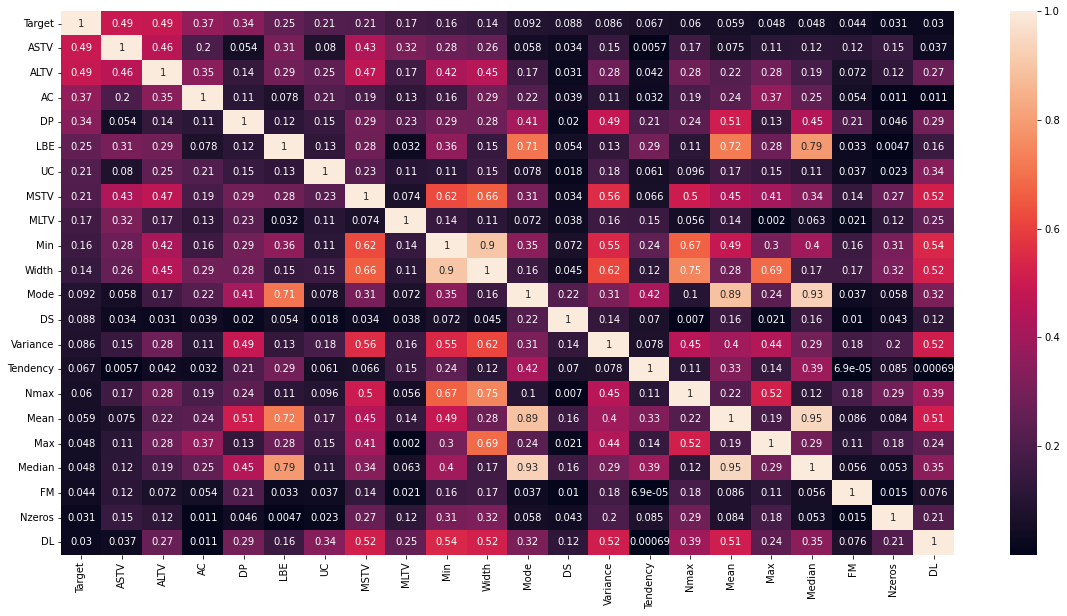

In [ ]:
# Se vuelve a crear un mapa de calor pero con las variables ordenadas, con el fin de ver cuales son utiles y descartar aquellas que hagan ruido, es decir que esten correlacionadas entre ellas 
Target = data.loc[:,['Target', 'ASTV', 'ALTV', 'AC', 'DP', 'LBE', 'UC', 'MSTV', 'MLTV', 'Min', 'Width', 'Mode', 'DS', 'Variance', 'Tendency', 'Nmax', 'Mean', 'Max', 'Median', 'FM', 'Nzeros', 'DL']]
plt.figure(figsize=(20,10))
sns.heatmap(Target.corr().abs(),annot = True)

Observando la matriz de correlacion, se escogeran  variables que esten altamente correlacionadas con el Target pero que no esten correlacionadas entre si para intentar no hacer un sobre entrenamiento.

# Gaussian

In [ ]:
train = data.loc[:,["Target","ASTV","AC","LBE","UC","Min","Width"]]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [ ]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [ ]:
x

,ASTV,AC,LBE,UC,Min,Width
0,73,0,120,0,62,64
1,17,4,132,4,68,130
2,16,2,133,5,68,130
3,16,2,134,6,53,117
4,16,4,132,5,53,117
...,...,...,...,...,...,...
2121,79,0,140,6,137,40
2122,78,1,140,9,103,66
2123,79,1,140,7,103,67
2124,78,1,140,9,103,66


In [ ]:
y

,Target
0,1
1,0
2,0
3,0
4,0
...,...
2121,1
2122,1
2123,1
2124,1


In [ ]:
# Modelizacion
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [ ]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

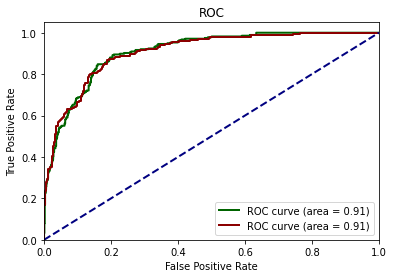

In [ ]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

# Todas las Gaussian

In [ ]:
Cuantitativas_continuas.columns

Index(['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
       'Max', 'Mode', 'Mean', 'Median', 'Variance'],
      dtype='object')

In [ ]:
train = data.loc[:,["Target",'LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min','Max', 'Mode', 'Mean', 'Median', 'Variance']]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [ ]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [ ]:
# Modelizacion
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [ ]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

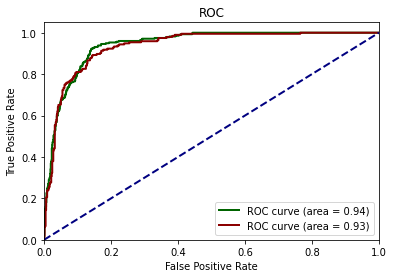

In [ ]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

# Gaussian con discretas


In [ ]:
Cuantitativas_continuas.columns

Index(['LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
       'Max', 'Mode', 'Mean', 'Median', 'Variance'],
      dtype='object')

In [ ]:
Cuantitativa_discreta.columns

Index(['Nmax', 'Nzeros', 'DL', 'DS', 'DP'], dtype='object')

In [ ]:
train = data.loc[:,["Target","ASTV","AC","LBE","UC","Min","Width","DP",'DS']]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [ ]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [ ]:
# Modelizacion
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [ ]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

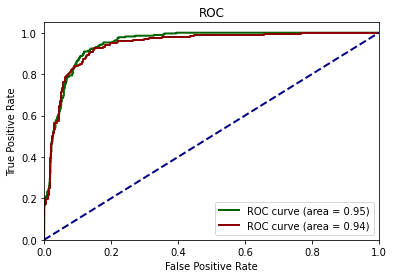

In [ ]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

# Multinomial

In [ ]:
Cuantitativa_discreta.columns

Index(['Nmax', 'Nzeros', 'DL', 'DS', 'DP'], dtype='object')

In [ ]:
train = data.loc[:,["Target",'Nmax', 'Nzeros', 'DL', 'DS', 'DP']]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [ ]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [ ]:
# Modelizacion
gnb = MultinomialNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [ ]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

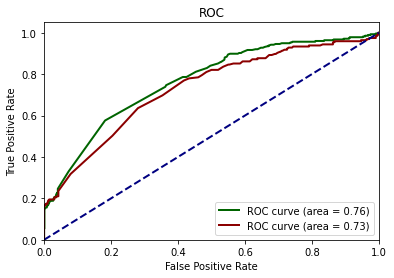

In [ ]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Debido a que es muy bajo el procentaje de prediccion se intentarea de combinar con dos variables continuas para que en su mayoria sean cuantitativas

# Multinomial con continuas

In [ ]:
Cuantitativa_discreta.columns

Index(['Nmax', 'Nzeros', 'DL', 'DS', 'DP'], dtype='object')

In [ ]:
train = data.loc[:,['Target','ASTV','AC','Nmax', 'Nzeros', 'DL', 'DS', 'DP']]
# plt.figure(figsize=(20,10))
# sns.pairplot(train) 

In [ ]:
x = train.loc[:,train.columns != "Target"]
y = train.loc[:,train.columns == "Target"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.40, random_state= 0)

In [ ]:
# Modelizacion
gnb = MultinomialNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)

## Validacion

In [ ]:
#Curva ROC y AUC para training
fpr_train,tpr_train,_ = roc_curve(y_train, y_pred_train[:,1])
roc_auc_train = auc (fpr_train, tpr_train)
#Curva ROC y AUC para test
fpr_test,tpr_test,_ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc (fpr_test, tpr_test)

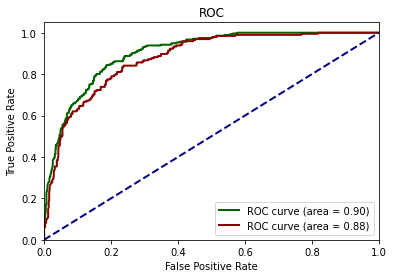

In [ ]:
# Grafica
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color = "darkred", lw=lw, label = "ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0,1], [0,1], color = "navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Como se puede observar, el nivel aumento, siendo esto ams preciso y teniendo menos difernecias entre el train y el test

# SVM

In [ ]:
model = SVC()

In [ ]:
X = data.loc[:,data.columns != "Target"]
y = data.loc[:,data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [ ]:
X

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,6,79,0.2,25,7.2,0,0,0,40,137,177,4,0,153,150,152,2,0
2122,140,1,0,9,78,0.4,22,7.1,0,0,0,66,103,169,6,0,152,148,151,3,1
2123,140,1,0,7,79,0.4,20,6.1,0,0,0,67,103,170,5,0,153,148,152,4,1
2124,140,1,0,9,78,0.4,27,7.0,0,0,0,66,103,169,6,0,152,147,151,4,1


In [ ]:
param_grid = [
    {"kernel": ["rbf"], "gamma": [1,0.1,0.5,0.01,0.005], "C": [0.1,0.5,1,2,3,5,10,50,100]},
    {"kernel": ["linear"], "C": [0.1,0.5,1,2,3,5,10,50,100]},
    {"kernel": ["poly"], "C": [0.1,0.5,1,2,3,5,10,50,100], "degree": [2,3]},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
grid.fit(X = X_train, y = y_train)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 2, 3, 5, 10, 50, 100],
                          'gamma': [1, 0.1, 0.5, 0.01, 0.005],
                          'kernel': ['rbf']},
                         {'C': [0.1, 0.5, 1, 2, 3, 5, 10, 50, 100],
                          'kernel': ['linear']},
                         {'C': [0.1, 0.5, 1, 2, 3, 5, 10, 50, 100],
                          'degree': [2, 3], 'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [ ]:
svmLineal = SVC(C = 1
                ,kernel='linear'
                ,degree = 1
                ,probability = True) 

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# Validación con el conjunto de Test
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

In [ ]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

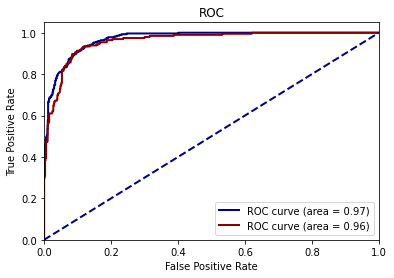

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkblue",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

# Conclusiones

El modelo por excelencia es SVM gracias a sus hiper parametros, la combinacion de ellos y la seleccion de los mejores para el modelo definitivo, sin embargo, es muy complejo saber que esta pasando por detras en este modelo a comparacion de Naive bayes.

Con respecto a Naive bayes, la eleccion de las variables se debe de hacer con "pinzas" para que nuestro modelo no este sobre entrenado, auqnue cada subalgoritmo funcione con ciertas variables, se puede obervar que usanso en su mayoria del tipo correspondinete y otras, los medelos tienen mejores resultados, elegir la subcategoria dependera del mayor porcentaje de variables en el, por lo cual la clasificacion de variables es de suma importancia.